In [1]:
from utils import *
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, timedelta as dt, timedelta
import datetime
from collections import Counter
import time
import pickle
from matplotlib import cm
import scipy
import subprocess
from matplotlib import patches
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


%matplotlib inline

In [2]:
def toYearFraction(datestring):
    from datetime import datetime as dt
    date = dt.strptime(datestring, '%Y-%m-%d')
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [3]:
end_date = toYearFraction('2020-02-14')

dec15 = toYearFraction('2019-12-15')
dec01 = toYearFraction('2019-12-01')
nov15 = toYearFraction('2019-11-15')
nov01 = toYearFraction('2019-11-01')
oct15 = toYearFraction('2019-10-15')
oct01 = toYearFraction('2019-10-01')
sep15 = toYearFraction('2019-09-15')
sep01 = toYearFraction('2019-09-01')

xticks = [sep01, sep15, oct01, oct15, nov01, nov15, dec01, dec15, 2020]
xtick_labels = ['Sep 01', 'Sep 15', 'Oct 01', 'Oct 15', 'Nov 01', 'Nov 15', 'Dec 01', 'Dec 15', 'Jan 01']


In [4]:
INPUT_DIR = '/rejectionSampling/0.28TF/'

# Single intro figure

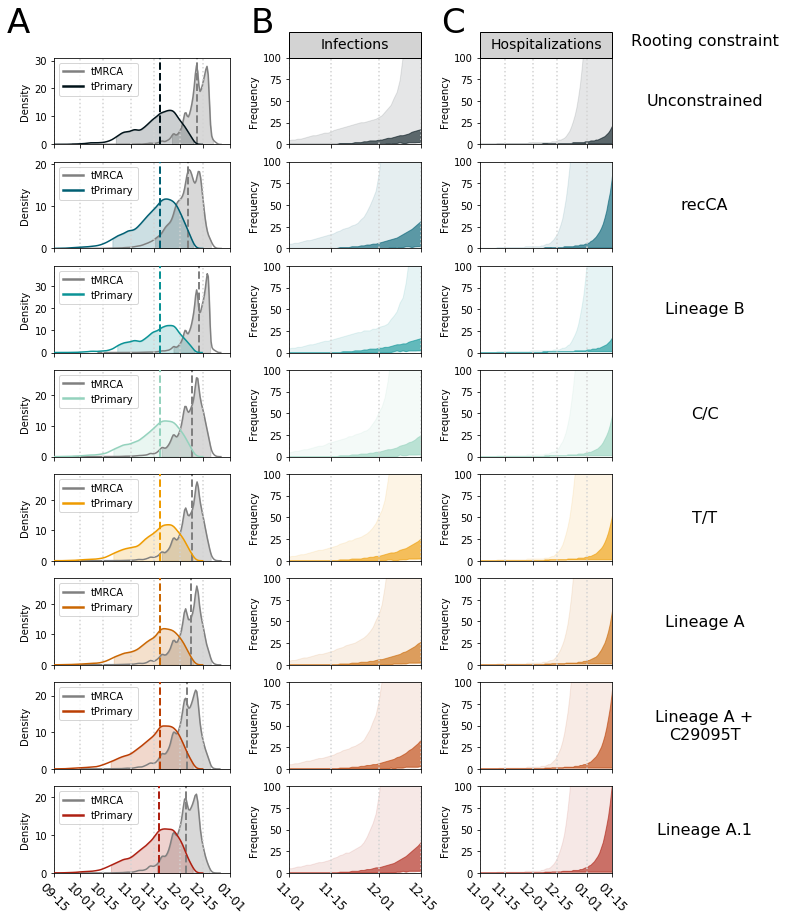

In [5]:
paths = ["BEAST.primary.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.BANAL_recMRCA.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootHu1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root28144C.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root8782T.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWH04.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle", 
         "BEAST.root20SF012.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWA1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle"]

cmap = ["001219","005f73","0a9396","94d2bd","ee9b00","ca6702","bb3e03","ae2012"]
cmap = ['#' + x for x in cmap]

paths = ["BEAST.primary.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.BANAL_recMRCA.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootHu1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root28144C.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root8782T.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWH04.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle", 
         "BEAST.root20SF012.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWA1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle"]

cmap = ["001219","005f73","0a9396","94d2bd","ee9b00","ca6702","bb3e03","ae2012"]
cmap = ['#' + x for x in cmap]

fig, axes = plt.subplots(8, 3, figsize = (10, 15), facecolor='white', gridspec_kw={'width_ratios': [4, 3, 3]})
count = 0
custom_lines = []
labels = []

xlim_epi_inf = ['2019-11-01', '2019-12-15']
# xlim_epi_inf = ['2019-11-01', '2020-01-15']
ylim_epi_inf = [0, 100]
# ylim_epi_inf = [0, 200]

xlim_epi_hosp = ['2019-11-01', '2020-01-15']
ylim_epi_hosp = [0, 100]

inf_comparison_date = 'dec15'
hosp_comparison_date = 'jan01'

legend_linewidth = 2.5

for path in paths:
    # print(path)

    fontsize=10
    rs_path = INPUT_DIR + '.'.join(path.split('.')[:4]) + '.txt'
    rs_A_path = INPUT_DIR + '.'.join(path.split('.')[:3] + path.split('.')[5:7]) + '.txt'
    rs_B_path = INPUT_DIR + '.'.join(path.split('.')[:5]) + '.txt'

    gemf_path = INPUT_DIR + '.'.join(path.split('.')[:4]) + '.cumulativeInfections.timedGEMF.stats.pickle'
    gemf_comb_path = INPUT_DIR + path
    gemf_A_path = INPUT_DIR + path.replace('combined', '2')
    gemf_B_path = INPUT_DIR + path.replace('combined', '1')

    # tMRCA + tPrimary
    df_rs = pd.read_csv(rs_path, sep='\t')
    sns.kdeplot(df_rs['BEASTtmrca'], ax=axes[count,0], color='grey', label='tMRCA', zorder=1)
    kde_x, kde_y = axes[count,0].lines[0].get_data()
    ylim_height = max(kde_y)*1.1
    hpd_lower, hpd_upper = hpd_single(df_rs['BEASTtmrca'], 0.05)
    hpd95_start, hpd95_end = False, False
    for x in kde_x:
        if x > hpd_lower and not hpd95_start:
            hpd95_start = x
        if x > hpd_upper and not hpd95_end:
            hpd95_end = x
    hpd95_start_index = np.where(kde_x == hpd95_start)[0][0]
    hpd95_end_index = np.where(kde_x == hpd95_end)[0][0]
    axes[count,0].fill_between(kde_x[hpd95_start_index:hpd95_end_index+1], kde_y[hpd95_start_index:hpd95_end_index+1], interpolate=False, color='grey', alpha = 0.3)
    median = np.median(df_rs['BEASTtmrca'])
    height = np.interp(median, kde_x, kde_y)
    axes[count,0].vlines(median, 0, ylim_height, color='grey', ls='--', linewidth=2, zorder=2)


    sns.kdeplot(df_rs['DateOfIndexCase'], ax=axes[count,0], color=cmap[count], label='tPrimary',  zorder=3)
    kde_x, kde_y = axes[count,0].lines[1].get_data()
    hpd_lower, hpd_upper = hpd_single(df_rs['DateOfIndexCase'], 0.05)
    hpd95_start, hpd95_end = False, False
    for x in kde_x:
        if x > hpd_lower and not hpd95_start:
            hpd95_start = x
        if x > hpd_upper and not hpd95_end:
            hpd95_end = x
    hpd95_start_index = np.where(kde_x == hpd95_start)[0][0]
    hpd95_end_index = np.where(kde_x == hpd95_end)[0][0]
    axes[count,0].fill_between(kde_x[hpd95_start_index:hpd95_end_index+1], kde_y[hpd95_start_index:hpd95_end_index+1], interpolate=False, color=cmap[count], alpha = 0.2)
    median = np.median(df_rs['DateOfIndexCase'])
    height = np.interp(median, kde_x, kde_y)
    axes[count,0].vlines(median, 0, ylim_height, color=cmap[count], ls='--', linewidth=2, zorder=4)

    axes[count,0].set_xticks(ticks=xticks)
    axes[count,0].set_xticklabels(labels=[])
    axes[count,0].set_xlabel(xlabel='')
    leg = axes[count,0].legend(loc='upper left', fontsize=fontsize)
    axes[count,0].set_ylabel(ylabel='Density', fontsize=fontsize)
    axes[count,0].vlines([x for x in xticks if x < 2020], 0, ylim_height, color='lightgrey', linestyle=':', linewidth=1.5)
    axes[count,0].set_ylim([0, ylim_height])
    axes[count,0].set_xlim([xticks[1], xticks[-1]])

    for line in leg.get_lines():
        line.set_linewidth(legend_linewidth)

    # infections 1 intro, hosp 1 intro
    alpha_95 = 0.1
    alpha_50 = 0.6 
    with (open(gemf_path, "rb")) as openfile:
        gemf_dict = pickle.load(openfile)
    dates = [str(datetime.datetime(2019, 1, 1) + timedelta(day-1))[:10] for day in gemf_dict['day']]
    compartment = 'inf'
    axes[count,1].fill_between(dates, gemf_dict[compartment][2.5], gemf_dict[compartment][97.5], color=cmap[count], alpha=alpha_95, label='95%')
    axes[count,1].fill_between(dates, gemf_dict[compartment][25], gemf_dict[compartment][75], color=cmap[count], alpha=alpha_50, label='50%')
    axes[count,1].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count,1].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='lightgrey', linestyle=':', linewidth=1.5)
    axes[count,1].set_xticklabels(labels=[])
    axes[count,1].set_ylabel(ylabel='Frequency', fontsize=fontsize)
    axes[count,1].set_xlim(xlim_epi_inf)
    axes[count,1].set_ylim(ylim_epi_inf)

    compartment = 'H'
    axes[count,2].fill_between(dates, gemf_dict[compartment][2.5], gemf_dict[compartment][97.5], color=cmap[count], alpha=alpha_95, label='95%')
    axes[count,2].fill_between(dates, gemf_dict[compartment][25], gemf_dict[compartment][75], color=cmap[count], alpha=alpha_50, label='50%')
    axes[count,2].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count,2].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='lightgrey', linestyle=':', linewidth=1.5)
    axes[count,2].set_ylabel(ylabel='Frequency', fontsize=fontsize)
    axes[count,2].set_xticklabels(labels=[])
    axes[count,2].set_xlim(xlim_epi_hosp)
    axes[count,2].set_ylim(ylim_epi_hosp)



    if count == 7:
        fontsize=12
        xtick_labels = ['09-01', '09-15', '10-01', '10-15', '11-01', '11-15', '12-01', '12-15', '01-01']
        axes[count,0].set_xticklabels(labels=xtick_labels, rotation=-45, fontsize=fontsize)
        axes[count,1].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count,2].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)

    count += 1
#     if count == 1:
#         break


# top labels 
h_topLabel = 0.3 
fontsize_topLabel = 14
rect1 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][1].transAxes, clip_on=False)
rect2 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][2].transAxes, clip_on=False)

axes[0][1].add_patch(rect1)
axes[0][2].add_patch(rect2)

axes[0][1].text(0.5, 1.00 + h_topLabel/2, 'Infections', ha="center", va="center" , transform=axes[0][1].transAxes, zorder=4, fontsize=fontsize_topLabel)
axes[0][2].text(0.5, 1.00 + h_topLabel/2, 'Hospitalizations', ha="center", va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=fontsize_topLabel)

# add side legend
w = 0.2
h = 0.3
fontsize = 16
ha = 'center'
if ha == 'left':
    w = 0.05
elif ha == 'center':
    w = 0.55
axes[0][2].text(1.1 + w + 0.05, 0.5, 'Unconstrained', ha=ha, va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=fontsize)
axes[1][2].text(1.1 + w + 0.05, 0.5, 'recCA', ha=ha, va="center" , transform=axes[1][2].transAxes, zorder=4, fontsize=fontsize)
axes[2][2].text(1.1 + w + 0.05, 0.5, 'Lineage B', ha=ha, va="center" , transform=axes[2][2].transAxes, zorder=4, fontsize=fontsize)
axes[3][2].text(1.1 + w + 0.05, 0.5, 'C/C', ha=ha, va="center" , transform=axes[3][2].transAxes, zorder=4, fontsize=fontsize)
axes[4][2].text(1.1 + w + 0.05, 0.5, 'T/T', ha=ha, va="center" , transform=axes[4][2].transAxes, zorder=4, fontsize=fontsize)
axes[5][2].text(1.1 + w + 0.05, 0.5, 'Lineage A', ha=ha, va="center" , transform=axes[5][2].transAxes, zorder=4, fontsize=fontsize)
axes[6][2].text(1.1 + w + 0.05, 0.5, 'Lineage A +\nC29095T', ha=ha, va="center" , transform=axes[6][2].transAxes, zorder=4, fontsize=fontsize)
axes[7][2].text(1.1 + w + 0.05, 0.5, 'Lineage A.1', ha=ha, va="center" , transform=axes[7][2].transAxes, zorder=4, fontsize=fontsize)

# legend box
legend_label = 'Rooting constraint' #  '$\it{Rooting}$' + '\n' + '$\it{constraint}$'
axes[0][2].text(1.1 + w + 0.05, 1.2, legend_label, ha=ha, va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=fontsize)

# add letter key
x = -0.2
y = 1.4
axes[0][0].text(x, y, 'A', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=34)
axes[0][1].text(x, y, 'B', ha="center", va="center" , transform=axes[0][1].transAxes, zorder=4, fontsize=34)
axes[0][2].text(x, y, 'C', ha="center", va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=34)


fig.subplots_adjust(wspace=.4)
# plt.savefig(OUTPUT + 'singleIntro_phyloEpi_' + OUTPUT_STRING + '.pdf', dpi=100, bbox_inches='tight')
# plt.savefig(OUTPUT + 'singleIntro_phyloEpi_' + OUTPUT_STRING + '.png', dpi=100, bbox_inches='tight')
plt.show()

# tMRCA/tPrimary intro figure

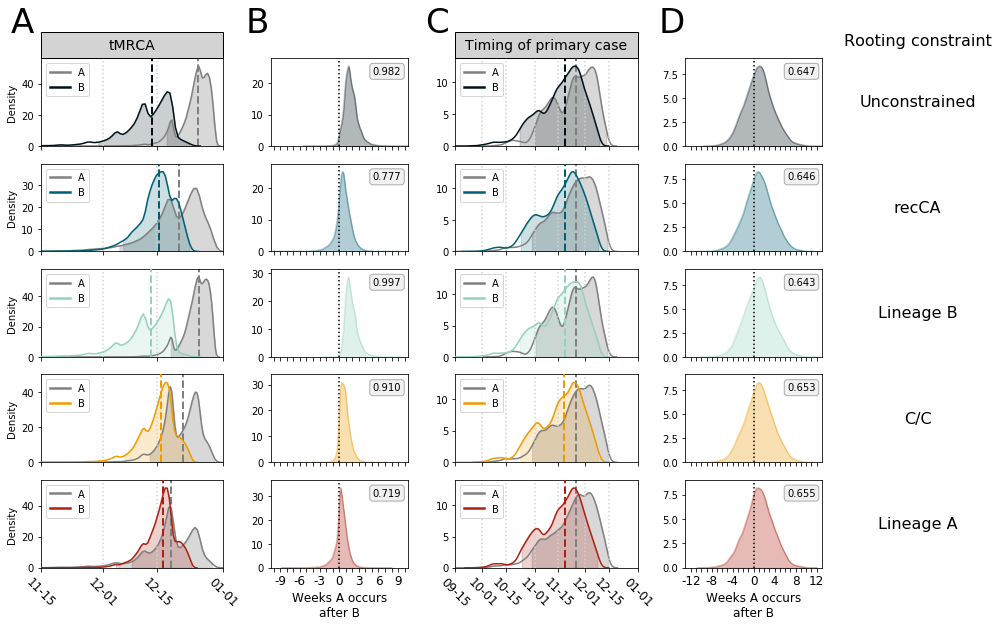

In [6]:
paths = ["BEAST.primary.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.BANAL_recMRCA.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootHu1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root28144C.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWH04.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle"]
cmap = ["001219","005f73","94d2bd","ee9b00","ae2012"]
cmap = ['#' + x for x in cmap]


fig, axes = plt.subplots(5, 4, figsize = (14, 15/8*5), facecolor='white', gridspec_kw={'width_ratios': [4, 3, 4, 3]})
count = 0
for path in paths:
    # print(path)

    fontsize=10
    rs_A_path = INPUT_DIR + '.'.join(path.split('.')[:3] + path.split('.')[5:7]) + '.txt'
    rs_B_path = INPUT_DIR + '.'.join(path.split('.')[:5]) + '.txt'
    # tMRCA A, B
    df_rs_A = pd.read_csv(rs_A_path, sep='\t')
    df_rs_B = pd.read_csv(rs_B_path, sep='\t')

    sns.kdeplot(df_rs_A['BEASTtmrca'], ax=axes[count,0], color='grey', label='A', zorder=1)
    kde_x, kde_y = axes[count,0].lines[0].get_data()
    kde_x, kde_y = axes[count,0].lines[0].get_data()
    hpd_lower, hpd_upper = hpd_single(df_rs_A['BEASTtmrca'], 0.05)
    hpd95_start, hpd95_end = False, False
    for x in kde_x:
        if x > hpd_lower and not hpd95_start:
            hpd95_start = x
        if x > hpd_upper and not hpd95_end:
            hpd95_end = x
    hpd95_start_index = np.where(kde_x == hpd95_start)[0][0]
    hpd95_end_index = np.where(kde_x == hpd95_end)[0][0]
    axes[count,0].fill_between(kde_x[hpd95_start_index:hpd95_end_index+1], kde_y[hpd95_start_index:hpd95_end_index+1], interpolate=False, color='grey', alpha = 0.3)

    sns.kdeplot(df_rs_B['BEASTtmrca'], ax=axes[count,0], color=cmap[count], label='B', zorder=3)
    kde_x, kde_y = axes[count,0].lines[1].get_data()
    hpd_lower, hpd_upper = hpd_single(df_rs_B['BEASTtmrca'], 0.05)
    hpd95_start, hpd95_end = False, False
    for x in kde_x:
        if x > hpd_lower and not hpd95_start:
            hpd95_start = x
        if x > hpd_upper and not hpd95_end:
            hpd95_end = x
    hpd95_start_index = np.where(kde_x == hpd95_start)[0][0]
    hpd95_end_index = np.where(kde_x == hpd95_end)[0][0]
    axes[count,0].fill_between(kde_x[hpd95_start_index:hpd95_end_index+1], kde_y[hpd95_start_index:hpd95_end_index+1], interpolate=False, color=cmap[count], alpha = 0.2)
    ylim_height = max(max(axes[count,0].lines[0].get_data()[1]), max(axes[count,0].lines[1].get_data()[1]))*1.1

    median_A = np.median(df_rs_A['BEASTtmrca'])
    median_B = np.median(df_rs_B['BEASTtmrca'])
    axes[count,0].vlines(median_A, 0, ylim_height, color='grey', ls='--', linewidth=2, zorder=2)
    axes[count,0].vlines(median_B, 0, ylim_height, color=cmap[count], ls='--', linewidth=2, zorder=4)

    axes[count,0].vlines([x for x in xticks if x < 2020], 0, ylim_height, color='lightgrey', linestyle=':', linewidth=1.5)
    axes[count,0].set_ylim([0, ylim_height])
    leg = axes[count,0].legend(loc='upper left', fontsize=fontsize)
    axes[count,0].set_xticks(ticks=xticks)
    axes[count,0].set_xticklabels(labels=[])
    axes[count,0].set_xlabel(xlabel='')
    axes[count,0].set_ylabel(ylabel='Density', fontsize=fontsize)
    axes[count,0].set_xlim([xticks[5], xticks[-1]])

    for line in leg.get_lines():
        line.set_linewidth(legend_linewidth)

    # tPrimary A, B
    sns.kdeplot(df_rs_A['DateOfIndexCase'], ax=axes[count,2], color='grey', label='A', zorder=1)
    kde_x, kde_y = axes[count,2].lines[0].get_data()
    hpd_lower, hpd_upper = hpd_single(df_rs_A['DateOfIndexCase'], 0.05)
    hpd95_start, hpd95_end = False, False
    for x in kde_x:
        if x > hpd_lower and not hpd95_start:
            hpd95_start = x
        if x > hpd_upper and not hpd95_end:
            hpd95_end = x
    hpd95_start_index = np.where(kde_x == hpd95_start)[0][0]
    hpd95_end_index = np.where(kde_x == hpd95_end)[0][0]
    axes[count,2].fill_between(kde_x[hpd95_start_index:hpd95_end_index+1], kde_y[hpd95_start_index:hpd95_end_index+1], interpolate=False, color='grey', alpha = 0.3)

    sns.kdeplot(df_rs_B['DateOfIndexCase'], ax=axes[count,2], color=cmap[count], label='B', zorder=3)
    kde_x, kde_y = axes[count,2].lines[1].get_data()
    hpd_lower, hpd_upper = hpd_single(df_rs_B['DateOfIndexCase'], 0.05)
    hpd95_start, hpd95_end = False, False
    for x in kde_x:
        if x > hpd_lower and not hpd95_start:
            hpd95_start = x
        if x > hpd_upper and not hpd95_end:
            hpd95_end = x
    hpd95_start_index = np.where(kde_x == hpd95_start)[0][0]
    hpd95_end_index = np.where(kde_x == hpd95_end)[0][0]
    axes[count,2].fill_between(kde_x[hpd95_start_index:hpd95_end_index+1], kde_y[hpd95_start_index:hpd95_end_index+1], interpolate=False, color=cmap[count], alpha = 0.2)
    ylim_height = max(max(axes[count,2].lines[0].get_data()[1]), max(axes[count,2].lines[1].get_data()[1]))*1.1

    median_A = np.median(df_rs_A['DateOfIndexCase'])
    median_B = np.median(df_rs_B['DateOfIndexCase'])
    axes[count,2].vlines(median_A, 0, ylim_height, color='grey', ls='--', linewidth=2, zorder=2)
    axes[count,2].vlines(median_B, 0, ylim_height, color=cmap[count], ls='--', linewidth=2, zorder=4)

    axes[count,2].vlines([x for x in xticks if x < 2020], 0, ylim_height, color='lightgrey', linestyle=':', linewidth=1.5)
    axes[count,2].set_ylim([0, ylim_height])
    leg = axes[count,2].legend(loc='upper left', fontsize=fontsize)
    axes[count,2].set_xticks(ticks=xticks)
    axes[count,2].set_xticklabels(labels=[])
    axes[count,2].set_xlabel(xlabel='')
    axes[count,2].set_ylabel(ylabel=None)
    axes[count,2].set_xlim([xticks[1], xticks[-1]])

    for line in leg.get_lines():
        line.set_linewidth(legend_linewidth)


    # tMRCA A - B
    series = df_rs_A['BEASTtmrca'] - df_rs_B['BEASTtmrca']
    prob = sum([x>0 for x in series])/len(series)
    sns.kdeplot(series, ax=axes[count,1], color=cmap[count], alpha=0.3)
    axes[count,1].text(0.85,0.85,"{:.3f}".format(prob), horizontalalignment='center', verticalalignment='center', transform=axes[count,1].transAxes,
                       bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round', alpha=0.3))
    kde_x, kde_y = axes[count,1].lines[0].get_data()
    axes[count,1].fill_between(kde_x, kde_y, interpolate=False, color=cmap[count], alpha = 0.3)
    axes[count,1].vlines(0,0,max(kde_y)*1.1, linestyle=':', color='black')
    axes[count,1].set_ylim([0,max(kde_y)*1.1])
    axes[count,1].set_xticks(np.linspace(-70,70,21)/365)
    axes[count,1].set_xlim([-0.2, 0.2])
    axes[count,1].set_xticklabels(labels=[])
    axes[count,1].set_xlabel(xlabel=None)
    axes[count,1].set_ylabel(ylabel=None)
    axes[count,1].get_legend().remove()

    # tPrimary A - B
    series = df_rs_A['DateOfIndexCase'] - df_rs_B['DateOfIndexCase']
    prob = sum([x>=0 for x in series])/len(series)
    sns.kdeplot(series, ax=axes[count,3], color=cmap[count], alpha=0.3)
    axes[count,3].text(0.85,0.85,"{:.3f}".format(prob), horizontalalignment='center', verticalalignment='center', transform=axes[count,3].transAxes,
                      bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round', alpha=0.3))
    kde_x, kde_y = axes[count,3].lines[0].get_data()
    axes[count,3].fill_between(kde_x, kde_y, interpolate=False, color=cmap[count], alpha = 0.3)
    axes[count,3].vlines(0,0,max(kde_y)*1.1, linestyle=':', color='black')
    axes[count,3].set_ylim([0,max(kde_y)*1.1])
    axes[count,3].set_xticks(np.linspace(-84,84,25)/365)
    axes[count,3].set_xlim([-0.25, 0.25])
    axes[count,3].set_xticklabels(labels=[])
    axes[count,3].set_xlabel(xlabel=None)
    axes[count,3].set_ylabel(ylabel=None)
    axes[count,3].get_legend().remove()


    if count == 4:
        fontsize=12
        xtick_labels = ['09-01', '09-15', '10-01', '10-15', '11-01', '11-15', '12-01', '12-15', '01-01']
        axes[count,0].set_xticklabels(labels=xtick_labels, rotation=-45, fontsize=fontsize)
        axes[count,1].set_xticklabels(labels=[int(x) if x % 3 == 0 else '' for x in np.linspace(-70,70,21)/7], fontsize=fontsize)
        axes[count,2].set_xticklabels(labels=xtick_labels, rotation=-45, fontsize=fontsize)
        axes[count,3].set_xticklabels(labels=[int(x) if x % 4 == 0 else '' for x in np.linspace(-84,84,25)/7], fontsize=fontsize)

        axes[count,1].set_xlabel('Weeks A occurs\nafter B',fontsize=fontsize)
        axes[count,3].set_xlabel('Weeks A occurs\nafter B',fontsize=fontsize)

    count += 1
#     if count >1:
#         break

# top labels 
h_topLabel = 0.3 
fontsize_topLabel = 14
rect0 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][0].transAxes, clip_on=False)
rect2 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][2].transAxes, clip_on=False)

axes[0][0].add_patch(rect0)
axes[0][2].add_patch(rect2)

axes[0][0].text(0.5, 1.00 + h_topLabel/2, 'tMRCA', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=fontsize_topLabel)
axes[0][2].text(0.5, 1.00 + h_topLabel/2, 'Timing of primary case', ha="center", va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=fontsize_topLabel)

# add side legend
w = 0.2
h = 0.3
fontsize=16
ha = 'center'
if ha == 'left':
    w = 0.05
elif ha == 'center':
    w = 0.55
axes[0][3].text(1.1 + w + 0.05, 0.5, 'Unconstrained', ha=ha, va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=fontsize)
axes[1][3].text(1.1 + w + 0.05, 0.5, 'recCA', ha=ha, va="center" , transform=axes[1][3].transAxes, zorder=4, fontsize=fontsize)
axes[2][3].text(1.1 + w + 0.05, 0.5, 'Lineage B', ha=ha, va="center" , transform=axes[2][3].transAxes, zorder=4, fontsize=fontsize)
axes[3][3].text(1.1 + w + 0.05, 0.5, 'C/C', ha=ha, va="center" , transform=axes[3][3].transAxes, zorder=4, fontsize=fontsize)
axes[4][3].text(1.1 + w + 0.05, 0.5, 'Lineage A', ha=ha, va="center" , transform=axes[4][3].transAxes, zorder=4, fontsize=fontsize)

# legend box
axes[0][3].text(1.1 + w + 0.05, 1.2, legend_label, ha=ha, va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=fontsize)

# add letter key
x = -0.1
y = 1.4
axes[0][0].text(x, y, 'A', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=34)
axes[0][1].text(x, y, 'B', ha="center", va="center" , transform=axes[0][1].transAxes, zorder=4, fontsize=34)
axes[0][2].text(x, y, 'C', ha="center", va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=34)
axes[0][3].text(x, y, 'D', ha="center", va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=34)



fig.subplots_adjust(wspace=.3)
# plt.savefig(OUTPUT + 'multiIntro_tMRCA_tPrimary_' + OUTPUT_STRING + '.pdf', dpi=100, bbox_inches='tight')
# plt.savefig(OUTPUT + 'multiIntro_tMRCA_tPrimary_' + OUTPUT_STRING + '.png', dpi=100, bbox_inches='tight')
plt.show()


# Multi intro infections

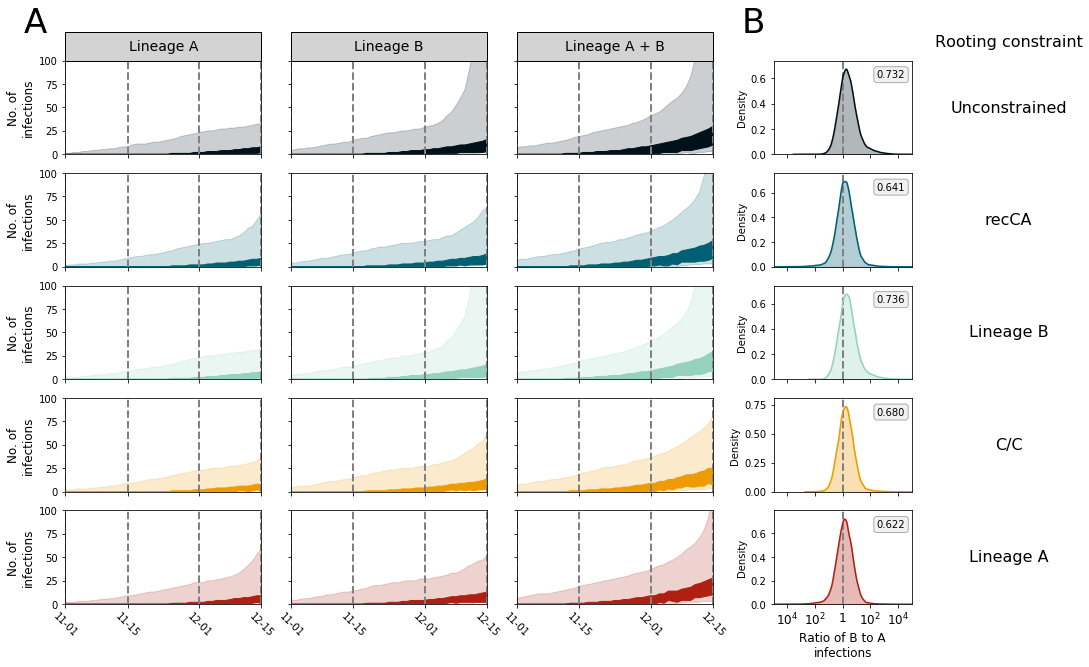

In [7]:
paths = ["BEAST.primary.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.BANAL_recMRCA.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootHu1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root28144C.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWH04.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle"]
cmap = ["001219","005f73","94d2bd","ee9b00","ae2012"]
cmap = ['#' + x for x in cmap]

plt.figure(figsize=(12,10))
gs1 = GridSpec(5, 3)
gs1.update(left=0, right=0.75, wspace=0.15)
ax00 = plt.subplot(gs1[0,0])
ax01 = plt.subplot(gs1[0,1])
ax02 = plt.subplot(gs1[0,2])
# ax03 = plt.subplot(gs1[0,3])
ax10 = plt.subplot(gs1[1,0])
ax11 = plt.subplot(gs1[1,1])
ax12 = plt.subplot(gs1[1,2])
# ax13 = plt.subplot(gs1[1,3])
ax20 = plt.subplot(gs1[2,0])
ax21 = plt.subplot(gs1[2,1])
ax22 = plt.subplot(gs1[2,2])
# ax23 = plt.subplot(gs1[2,3])
ax30 = plt.subplot(gs1[3,0])
ax31 = plt.subplot(gs1[3,1])
ax32 = plt.subplot(gs1[3,2])
# ax33 = plt.subplot(gs1[3,3])
ax40 = plt.subplot(gs1[4,0])
ax41 = plt.subplot(gs1[4,1])
ax42 = plt.subplot(gs1[4,2])
# ax43 = plt.subplot(gs1[4,3])

gs2 = GridSpec(5,1)
gs2.update(left=0.82, right=0.98)
ax03 = plt.subplot(gs2[0])
ax13 = plt.subplot(gs2[1])
ax23 = plt.subplot(gs2[2])
ax33 = plt.subplot(gs2[3])
ax43 = plt.subplot(gs2[4])

axes = [[ax00, ax01, ax02, ax03],
        [ax10, ax11, ax12, ax13],
        [ax20, ax21, ax22, ax23],
        [ax30, ax31, ax32, ax33],
        [ax40, ax41, ax42, ax43]]

count = 0
compartment = 'inf'
for path in paths:
    # print(count)
    fontsize=12

    rs_path = INPUT_DIR + '.'.join(path.split('.')[:4]) + '.txt'
    rs_A_path = INPUT_DIR + '.'.join(path.split('.')[:3] + path.split('.')[5:7]) + '.txt'
    rs_B_path = INPUT_DIR + '.'.join(path.split('.')[:5]) + '.txt'

    gemf_path = INPUT_DIR + '.'.join(path.split('.')[:4]) + '.cumulativeInfections.timedGEMF.stats.pickle'
    gemf_comb_path = INPUT_DIR + path
    gemf_A_path = INPUT_DIR + path.replace('combined', '2')
    gemf_B_path = INPUT_DIR + path.replace('combined', '1')

    # infections A, hosp A
    fontsize=12
    with (open(gemf_A_path, "rb")) as openfile:
            gemf_A_dict = pickle.load(openfile)
    dates = [str(datetime.datetime(2019, 1, 1) + timedelta(day-1))[:10] for day in gemf_A_dict['day']]
    axes[count][0].fill_between(dates, gemf_A_dict[compartment][2.5], gemf_A_dict[compartment][97.5], color=cmap[count], alpha=.2, label='95%')
    axes[count][0].fill_between(dates, gemf_A_dict[compartment][25], gemf_A_dict[compartment][75], color=cmap[count], alpha=1, label='50%')
    axes[count][0].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count][0].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='grey', linestyle='--', linewidth=2)
    axes[count][0].set_xticklabels(labels=[])
    axes[count][0].set_xlim(xlim_epi_inf)
    axes[count][0].set_ylim(ylim_epi_inf)
    axes[count][0].set_ylabel(ylabel='No. of\ninfections', fontsize=fontsize)

    # infections B, hosp B
    with (open(gemf_B_path, "rb")) as openfile:
            gemf_B_dict = pickle.load(openfile)
    axes[count][1].fill_between(dates, gemf_B_dict[compartment][2.5], gemf_B_dict[compartment][97.5], color=cmap[count], alpha=.2, label='95%')
    axes[count][1].fill_between(dates, gemf_B_dict[compartment][25], gemf_B_dict[compartment][75], color=cmap[count], alpha=1, label='50%')
    axes[count][1].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count][1].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='grey', linestyle='--', linewidth=2)
    axes[count][1].set_xticklabels(labels=[])
    axes[count][1].set_yticklabels(labels=[])
    axes[count][1].set_xlim(xlim_epi_inf)
    axes[count][1].set_ylim(ylim_epi_inf)

    with (open(gemf_comb_path, "rb")) as openfile:
        gemf_comb_dict = pickle.load(openfile)
    axes[count][2].fill_between(dates, gemf_comb_dict[compartment][2.5], gemf_comb_dict[compartment][97.5], color=cmap[count], alpha=.2, label='95%')
    axes[count][2].fill_between(dates, gemf_comb_dict[compartment][25], gemf_comb_dict[compartment][75], color=cmap[count], alpha=1, label='50%')
    axes[count][2].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count][2].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='grey', linestyle='--', linewidth=2)
    axes[count][2].set_xticklabels(labels=[])
    axes[count][2].set_yticklabels(labels=[])
    axes[count][2].set_xlim(xlim_epi_inf)
    axes[count][2].set_ylim(ylim_epi_inf)

    # num B inf / num A inf on Jan 02
    jan01_B_path = INPUT_DIR + path.replace('_combined.stats.pickle', '_1.' + inf_comparison_date + '.tsv')
    jan01_A_path = INPUT_DIR + path.replace('_combined.stats.pickle', '_2.' + inf_comparison_date + '.tsv')
    jan01_B_results = pd.read_csv(jan01_B_path, sep='\t')[compartment]
    jan01_A_results = pd.read_csv(jan01_A_path, sep='\t')[compartment]
    series = [np.log10(x) for x in jan01_B_results/jan01_A_results]
    sns.kdeplot(series, ax=axes[count][3], color=cmap[count], label='B>A: %f' % (sum([x>0 for x in series])/len(series)))
    prob = sum([x>=0 for x in series])/len(series)
    axes[count][3].text(0.85,0.85,"{:.3f}".format(prob), horizontalalignment='center', verticalalignment='center', transform=axes[count][3].transAxes,
                      bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round', alpha=0.3))
    kde_x, kde_y = axes[count][3].lines[0].get_data()
    axes[count][3].fill_between(kde_x, kde_y, interpolate=False, color=cmap[count], alpha = 0.3)
    axes[count][3].vlines(0, 0, max(kde_y)*1.1, color='grey', linestyle='--', linewidth=2)
    axes[count][3].set_ylim(0, max(kde_y)*1.1)
    axes[count][3].set_xlim([-5,5])
    axes[count][3].set_xticks(ticks=np.linspace(-4,4,5))
    axes[count][3].set_xticklabels(labels=[])
    axes[count][3].set_xlabel(xlabel='')
    axes[count][3].set_ylabel(ylabel='Density')
    axes[count][3].get_legend().remove()

    if count == 4:
        fontsize=10
        xtick_labels = ['09-01', '09-15', '10-01', '10-15', '11-01', '11-15', '12-01', '12-15', '01-01']
        axes[count][0].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count][1].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count][2].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count][3].set_xticklabels(labels=[r'$10^4$', r'$10^2$', r'$1$', r'$10^2$', r'$10^4$'], fontsize=12, rotation=0)
        axes[count][3].set_xlabel(xlabel='Ratio of B to A\ninfections', fontsize=12)

    count += 1
#     if count >0:
#         break

# top labels 
h_topLabel = 0.3 
fontsize_topLabel = 14 
rect0 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][0].transAxes, clip_on=False)
rect1 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][1].transAxes, clip_on=False)
rect2 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][2].transAxes, clip_on=False)

axes[0][0].add_patch(rect0)
axes[0][1].add_patch(rect1)
axes[0][2].add_patch(rect2)

axes[0][0].text(0.5, 1.00 + h_topLabel/2, 'Lineage A', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=fontsize_topLabel)
axes[0][1].text(0.5, 1.00 + h_topLabel/2, 'Lineage B', ha="center", va="center" , transform=axes[0][1].transAxes, zorder=4, fontsize=fontsize_topLabel)
axes[0][2].text(0.5, 1.00 + h_topLabel/2, 'Lineage A + B', ha="center", va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=fontsize_topLabel)

# add side legend
w = 0.2
h = 0.3
fontsize=16
ha = 'center'
if ha == 'left':
    w = 0.05
elif ha == 'center':
    w = 0.55
axes[0][3].text(1.1 + w + 0.05, 0.5, 'Unconstrained', ha=ha, va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=fontsize)
axes[1][3].text(1.1 + w + 0.05, 0.5, 'recCA', ha=ha, va="center" , transform=axes[1][3].transAxes, zorder=4, fontsize=fontsize)
axes[2][3].text(1.1 + w + 0.05, 0.5, 'Lineage B', ha=ha, va="center" , transform=axes[2][3].transAxes, zorder=4, fontsize=fontsize)
axes[3][3].text(1.1 + w + 0.05, 0.5, 'C/C', ha=ha, va="center" , transform=axes[3][3].transAxes, zorder=4, fontsize=fontsize)
axes[4][3].text(1.1 + w + 0.05, 0.5, 'Lineage A', ha=ha, va="center" , transform=axes[4][3].transAxes, zorder=4, fontsize=fontsize)

# legend box
axes[0][3].text(1.1 + w + 0.05, 1.2, legend_label, ha=ha, va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=fontsize)

# add letter key
x = -0.15
y = 1.4
axes[0][0].text(x, y, 'A', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=34)
axes[0][3].text(x, y, 'B', ha="center", va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=34)

# plt.savefig(OUTPUT + 'multiIntro_infections_' + OUTPUT_STRING + '.pdf', dpi=100, bbox_inches='tight')
# plt.savefig(OUTPUT + 'multiIntro_infections_' + OUTPUT_STRING + '.png', dpi=100, bbox_inches='tight')
plt.show()


# Multi intro hospitalization

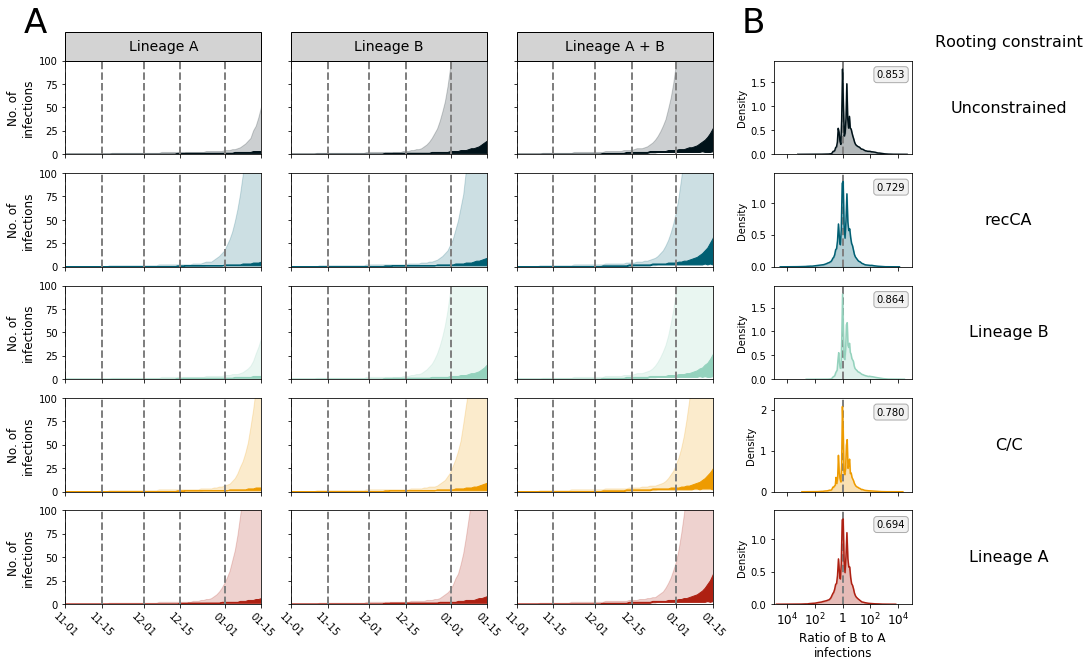

In [8]:
paths = ["BEAST.primary.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.BANAL_recMRCA.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootHu1.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.root28144C.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle",
         "BEAST.rootWH04.IH.Dec10_16.linB.Dec15_25.linA.cumulativeInfections.timedGEMF_combined.stats.pickle"]
cmap = ["001219","005f73","94d2bd","ee9b00","ae2012"]
cmap = ['#' + x for x in cmap]

plt.figure(figsize=(12,10))
gs1 = GridSpec(5, 3)
gs1.update(left=0, right=0.75, wspace=0.15)
ax00 = plt.subplot(gs1[0,0])
ax01 = plt.subplot(gs1[0,1])
ax02 = plt.subplot(gs1[0,2])
# ax03 = plt.subplot(gs1[0,3])
ax10 = plt.subplot(gs1[1,0])
ax11 = plt.subplot(gs1[1,1])
ax12 = plt.subplot(gs1[1,2])
# ax13 = plt.subplot(gs1[1,3])
ax20 = plt.subplot(gs1[2,0])
ax21 = plt.subplot(gs1[2,1])
ax22 = plt.subplot(gs1[2,2])
# ax23 = plt.subplot(gs1[2,3])
ax30 = plt.subplot(gs1[3,0])
ax31 = plt.subplot(gs1[3,1])
ax32 = plt.subplot(gs1[3,2])
# ax33 = plt.subplot(gs1[3,3])
ax40 = plt.subplot(gs1[4,0])
ax41 = plt.subplot(gs1[4,1])
ax42 = plt.subplot(gs1[4,2])
# ax43 = plt.subplot(gs1[4,3])

gs2 = GridSpec(5,1)
gs2.update(left=0.82, right=0.98)
ax03 = plt.subplot(gs2[0])
ax13 = plt.subplot(gs2[1])
ax23 = plt.subplot(gs2[2])
ax33 = plt.subplot(gs2[3])
ax43 = plt.subplot(gs2[4])

axes = [[ax00, ax01, ax02, ax03],
        [ax10, ax11, ax12, ax13],
        [ax20, ax21, ax22, ax23],
        [ax30, ax31, ax32, ax33],
        [ax40, ax41, ax42, ax43]]

count = 0
compartment = 'H'
for path in paths:
    # print(count)
    fontsize=12

    rs_path = INPUT_DIR + '.'.join(path.split('.')[:4]) + '.txt'
    rs_A_path = INPUT_DIR + '.'.join(path.split('.')[:3] + path.split('.')[5:7]) + '.txt'
    rs_B_path = INPUT_DIR + '.'.join(path.split('.')[:5]) + '.txt'

    gemf_path = INPUT_DIR + '.'.join(path.split('.')[:4]) + '.cumulativeInfections.timedGEMF.stats.pickle'
    gemf_comb_path = INPUT_DIR + path
    gemf_A_path = INPUT_DIR + path.replace('combined', '2')
    gemf_B_path = INPUT_DIR + path.replace('combined', '1')

    # infections A, hosp A
    fontsize=12
    with (open(gemf_A_path, "rb")) as openfile:
            gemf_A_dict = pickle.load(openfile)
    dates = [str(datetime.datetime(2019, 1, 1) + timedelta(day-1))[:10] for day in gemf_A_dict['day']]
    axes[count][0].fill_between(dates, gemf_A_dict[compartment][2.5], gemf_A_dict[compartment][97.5], color=cmap[count], alpha=.2, label='95%')
    axes[count][0].fill_between(dates, gemf_A_dict[compartment][25], gemf_A_dict[compartment][75], color=cmap[count], alpha=1, label='50%')
    axes[count][0].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count][0].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='grey', linestyle='--', linewidth=2)
    axes[count][0].set_xticklabels(labels=[])
    axes[count][0].set_xlim(xlim_epi_hosp)
    axes[count][0].set_ylim(ylim_epi_hosp)
    axes[count][0].set_ylabel(ylabel='No. of\ninfections', fontsize=fontsize)

    # infections B, hosp B
    with (open(gemf_B_path, "rb")) as openfile:
            gemf_B_dict = pickle.load(openfile)
    axes[count][1].fill_between(dates, gemf_B_dict[compartment][2.5], gemf_B_dict[compartment][97.5], color=cmap[count], alpha=.2, label='95%')
    axes[count][1].fill_between(dates, gemf_B_dict[compartment][25], gemf_B_dict[compartment][75], color=cmap[count], alpha=1, label='50%')
    axes[count][1].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count][1].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='grey', linestyle='--', linewidth=2)
    axes[count][1].set_xticklabels(labels=[])
    axes[count][1].set_yticklabels(labels=[])
    axes[count][1].set_xlim(xlim_epi_hosp)
    axes[count][1].set_ylim(ylim_epi_hosp)

    with (open(gemf_comb_path, "rb")) as openfile:
        gemf_comb_dict = pickle.load(openfile)
    axes[count][2].fill_between(dates, gemf_comb_dict[compartment][2.5], gemf_comb_dict[compartment][97.5], color=cmap[count], alpha=.2, label='95%')
    axes[count][2].fill_between(dates, gemf_comb_dict[compartment][25], gemf_comb_dict[compartment][75], color=cmap[count], alpha=1, label='50%')
    axes[count][2].set_xticks([x for x in dates if (x.endswith('01') or x.endswith('15'))])
    axes[count][2].vlines([x for x in dates if (x.endswith('01') or x.endswith('15')) if '01-15' not in x], 0, 200, color='grey', linestyle='--', linewidth=2)
    axes[count][2].set_xticklabels(labels=[])
    axes[count][2].set_yticklabels(labels=[])
    axes[count][2].set_xlim(xlim_epi_hosp)
    axes[count][2].set_ylim(ylim_epi_hosp)

    # num B inf / num A inf on Jan 01
    jan01_B_path = INPUT_DIR + path.replace('_combined.stats.pickle', '_1.' + hosp_comparison_date + '.tsv')
    jan01_A_path = INPUT_DIR + path.replace('_combined.stats.pickle', '_2.' + hosp_comparison_date + '.tsv')
    jan01_B_results = pd.read_csv(jan01_B_path, sep='\t')[compartment]
    jan01_A_results = pd.read_csv(jan01_A_path, sep='\t')[compartment]
    series = [np.log10(x) for x in jan01_B_results/jan01_A_results]
    sns.kdeplot(series, ax=axes[count][3], color=cmap[count], label='B>A: %f' % (sum([x>0 for x in series])/len(series)))
    prob = sum([x>=0 for x in series])/len(series)
    axes[count][3].text(0.85,0.85,"{:.3f}".format(prob), horizontalalignment='center', verticalalignment='center', transform=axes[count][3].transAxes,
                      bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round', alpha=0.3))
    kde_x, kde_y = axes[count][3].lines[0].get_data()
    axes[count][3].fill_between(kde_x, kde_y, interpolate=False, color=cmap[count], alpha = 0.3)
    axes[count][3].vlines(0, 0, max(kde_y)*1.1, color='grey', linestyle='--', linewidth=2)
    axes[count][3].set_ylim(0, max(kde_y)*1.1)
    axes[count][3].set_xlim([-5,5])
    axes[count][3].set_xticks(ticks=np.linspace(-4,4,5))
    axes[count][3].set_xticklabels(labels=[])
    axes[count][3].set_xlabel(xlabel='')
    axes[count][3].set_ylabel(ylabel='Density')
    axes[count][3].get_legend().remove()

    if count == 4:
        fontsize=10
        xtick_labels = ['09-01', '09-15', '10-01', '10-15', '11-01', '11-15', '12-01', '12-15', '01-01']
        axes[count][0].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count][1].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count][2].set_xticklabels(labels=[x[5:] for x in dates if (x.endswith('01') or x.endswith('15'))], rotation=-45, fontsize=fontsize)
        axes[count][3].set_xticklabels(labels=[r'$10^4$', r'$10^2$', r'$1$', r'$10^2$', r'$10^4$'], fontsize=12, rotation=0)
        axes[count][3].set_xlabel(xlabel='Ratio of B to A\ninfections', fontsize=12)

    count += 1
#     if count >0:
#         break

h_topLabel = 0.3 
fontsize_topLabel = 14 
rect0 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][0].transAxes, clip_on=False)
rect1 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][1].transAxes, clip_on=False)
rect2 = patches.Rectangle((0, 1), width=1, height=h_topLabel, facecolor='lightgrey', edgecolor='black', linewidth=1, transform=axes[0][2].transAxes, clip_on=False)

axes[0][0].add_patch(rect0)
axes[0][1].add_patch(rect1)
axes[0][2].add_patch(rect2)

axes[0][0].text(0.5, 1.00 + h_topLabel/2, 'Lineage A', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=fontsize_topLabel)
axes[0][1].text(0.5, 1.00 + h_topLabel/2, 'Lineage B', ha="center", va="center" , transform=axes[0][1].transAxes, zorder=4, fontsize=fontsize_topLabel)
axes[0][2].text(0.5, 1.00 + h_topLabel/2, 'Lineage A + B', ha="center", va="center" , transform=axes[0][2].transAxes, zorder=4, fontsize=fontsize_topLabel)

# add side legend
w = 0.2
h = 0.3
fontsize=16
ha = 'center'
if ha == 'left':
    w = 0.05
elif ha == 'center':
    w = 0.55
axes[0][3].text(1.1 + w + 0.05, 0.5, 'Unconstrained', ha=ha, va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=fontsize)
axes[1][3].text(1.1 + w + 0.05, 0.5, 'recCA', ha=ha, va="center" , transform=axes[1][3].transAxes, zorder=4, fontsize=fontsize)
axes[2][3].text(1.1 + w + 0.05, 0.5, 'Lineage B', ha=ha, va="center" , transform=axes[2][3].transAxes, zorder=4, fontsize=fontsize)
axes[3][3].text(1.1 + w + 0.05, 0.5, 'C/C', ha=ha, va="center" , transform=axes[3][3].transAxes, zorder=4, fontsize=fontsize)
axes[4][3].text(1.1 + w + 0.05, 0.5, 'Lineage A', ha=ha, va="center" , transform=axes[4][3].transAxes, zorder=4, fontsize=fontsize)

# legend box
axes[0][3].text(1.1 + w + 0.05, 1.2, legend_label, ha=ha, va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=fontsize)

# add letter key
x = -0.15
y = 1.4
axes[0][0].text(x, y, 'A', ha="center", va="center" , transform=axes[0][0].transAxes, zorder=4, fontsize=34)
axes[0][3].text(x, y, 'B', ha="center", va="center" , transform=axes[0][3].transAxes, zorder=4, fontsize=34)


# plt.savefig(OUTPUT + 'multiIntro_hospitalizations_' + OUTPUT_STRING + '.pdf', dpi=100, bbox_inches='tight')
# plt.savefig(OUTPUT + 'multiIntro_hospitalizations_' + OUTPUT_STRING + '.png', dpi=100, bbox_inches='tight')
plt.show()